# Flights Data Exploration 
## by Minh Anh Nguyen

## Introduction
> The dataset name is "Airline On-Time Performance Data". This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. The dataset description [here](https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D). Download dataset [here](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009).

<!-- > This project uses dataset in 1-year period of 2008  -->

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set_color_codes('muted')

In [2]:
# Get files path
import os
cwd  = os.getcwd() 
folder = os.path.join(cwd, "Data")
files = os.listdir(folder)
print(files)

['2006.csv.bz2', 'airports.csv', 'carriers.csv', 'plane-data.csv', 'variable-descriptions.csv']


### Airline On-Time Performance Dataset
> This contains scheduled and actual departure and arrival times reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).

In [3]:
# # take only data files from 2004 to 2008
# flight_files =  ['Data/' + file_ for file_ in files if 'bz2' in file_][-3:]
# flight_files

In [4]:
# first_file = flight_files[0]
# flight = pd.read_csv(first_file)

# for filee in flight_files[1:]:
#     df = pd.read_csv(filee)
#     flight = pd.concat([df_result, df])
    
# # print(flight.shape)

In [3]:
flight = pd.read_csv('Data/2006.csv.bz2')

In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141922 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [7]:
flight.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0
5,2006,1,11,3,627.0,630,834.0,832,US,295,...,6,13,0,NaN,0,0,0,0,0,0
6,2006,1,11,3,825.0,820,1041.0,1021,US,349,...,4,21,0,NaN,0,0,0,20,0,0
7,2006,1,11,3,942.0,945,1155.0,1148,US,356,...,4,8,0,NaN,0,0,0,0,0,0
8,2006,1,11,3,1239.0,1245,1438.0,1445,US,775,...,4,12,0,NaN,0,0,0,0,0,0
9,2006,1,11,3,1642.0,1645,1841.0,1845,US,1002,...,4,10,0,NaN,0,0,0,0,0,0


In [8]:
flight.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7141922.0,7.141922e+06,7.141922e+06,7.141922e+06,7.019988e+06,7.141922e+06,7.003802e+06,7.141922e+06,7.141922e+06,7.003802e+06,...,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06
mean,2006.0,6.562766e+00,1.573063e+01,3.949934e+00,1.340392e+03,1.332248e+03,1.486921e+03,1.495765e+03,2.186765e+03,1.260601e+02,...,7.279974e+02,7.061624e+00,1.574530e+01,1.707300e-02,2.266337e-03,3.396186e+00,6.796270e-01,3.585970e+00,3.099600e-02,4.515005e+00
std,0.0,3.424931e+00,8.786689e+00,1.991913e+00,4.765090e+02,4.625505e+02,5.008019e+02,4.786718e+02,1.989384e+03,7.131959e+01,...,5.745307e+02,3.112340e+01,1.127117e+01,1.295435e-01,4.755208e-02,1.880046e+01,8.492678e+00,1.562795e+01,1.277919e+00,1.986008e+01
min,2006.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2006.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.110000e+03,1.115000e+03,5.840000e+02,7.500000e+01,...,3.160000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2006.0,7.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.519000e+03,1.493000e+03,1.070000e+02,...,5.740000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2006.0,1.000000e+01,2.300000e+01,6.000000e+00,1.732000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.442000e+03,1.560000e+02,...,9.560000e+02,8.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2006.0,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.359000e+03,9.619000e+03,1.879000e+03,...,4.962000e+03,1.501000e+03,6.020000e+02,1.000000e+00,1.000000e+00,1.666000e+03,1.163000e+03,1.392000e+03,3.540000e+02,1.366000e+03


In [6]:
flight[flight['DepDelay']>0]['Cancelled'].sum()

0

#### Filght dataset structure
> The flight dataset has 7.141.922 records with 29 features, mostly numeric.

#### Main features of interest
> Flight delay analysis and study of influencing factors.
>-  Maximum delay time and reason
>-  Airline has most delay flight and most delay time
>-  Day of week has most delay department time

#### Features in the dataset may support investigation into features of interest
> UniqueCarrier, Origin, Dest and ArrDelay, DepDelay may suggest a main idea of how long  a flight is delayed. A look at time could reveal how much delay time vary.

### Additional Datasets
> 4 datasets including 1 variable descriptions table of flight dataset and 3 dim tables (airports, carriers, plane).

In [7]:
# Open csv files
df_name = []
df_list = []
for f in files:
    if f.endswith(".csv"):
        name = f.split(".")[0].split("-")[0]
        # Get and modify file name
        df_name.append(name)
        # Read file and store in a  list
        temp_df = pd.read_csv('Data/' + f)
        df_list.append(temp_df)
# Seperate files in list and rename
for i in range(len(df_list)):
    globals()[f"{df_name[i]}"] = df_list[i]

#### Airports Datasets
> 3376 records with 7 features

In [10]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [11]:
airports.head(10)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
5,01M,Tishomingo County,Belmont,MS,USA,34.491667,-88.201111
6,02A,Gragg-Wade,Clanton,AL,USA,32.850487,-86.611453
7,02C,Capitol,Brookfield,WI,USA,43.087510,-88.177869
8,02G,Columbiana County,East Liverpool,OH,USA,40.673313,-80.641406
9,03D,Memphis Memorial,Memphis,MO,USA,40.447259,-92.226961


#### Carriers Datasets
> 1491 records with 2 features. Description is carriers name and need to be cleaned

In [13]:
carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1490 non-null   object
 1   Description  1491 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [13]:
carriers.head(10)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,"Swift Air, LLC"
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"


In [8]:
# check carrier name
carriers_check_name = carriers['Description'].str.len().nlargest(10).index
carriers.iloc[carriers_check_name]

,Code,Description
1308,US,US Airways Inc. (Merged with America West 9/05...
642,HP,America West Airlines Inc. (Merged with US Air...
60,6R,Aerounion Aerotransporte de Carga Union SA de CV
1054,QT,Transportes Aereos Mercantiles Panamericanos S.A
850,MRQ,"National Air Cargo Group, Inc.d/b/a Murray Air"
1460,YAT,"Friendship Airways, Inc. d/b/a Yellow Air Taxi"
690,JAG,JetAlliance Flugbetriebs d/b/a JAF Airservice
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"
262,B4,Globespan Airways Limited d/b/a Flyglobespan
720,K3,Venture Travel LLC d/b/a Taquan Air Service


In [9]:
# standardize carrier name
carriers['Description'] = carriers['Description'].str.split('(', expand=True).iloc[:,0].str.split('d/b/a', expand=True).iloc[:,0]

#### Plane Datasets
> 5029 records with 9 features

In [16]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [17]:
plane.head(10)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,N056AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,N057AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,N058AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,N059AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,N060AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Variable descriptions of flight dataset

In [18]:
variable.drop([0,1,2], inplace = True )
variable.reset_index(inplace = True)
variable.drop(columns = ['index','Variable descriptions'], inplace = True )
variable.columns = ['Name','Description']
variable

,Name,Description
0,Month,12-Jan
1,DayofMonth,31-Jan
2,DayOfWeek,1 (Monday) - 7 (Sunday)
3,DepTime,"actual departure time (local, hhmm)"
4,CRSDepTime,"scheduled departure time (local, hhmm)"
5,ArrTime,"actual arrival time (local, hhmm)"
6,CRSArrTime,"scheduled arrival time (local, hhmm)"
7,UniqueCarrier,unique carrier code
8,FlightNum,flight number
9,TailNum,plane tail number


## Univariate Exploration
> In this section, investigate distributions of individual variables.

### 1. Delay time
> Delay time is considered by 2 other factors which is Department Delay time (DepDelay) and Arrive Delay time (ArrDelay)

#### 1.1. Delay flights percentage

> **What is the percentage of delayed flights?**

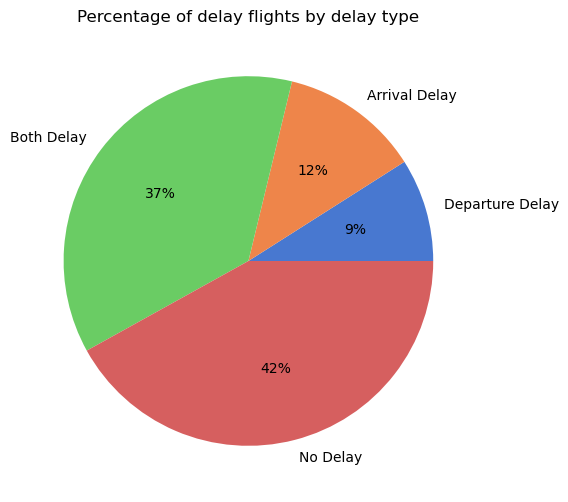

In [7]:
plt.subplots(figsize  = (6,6))

num_dep_delay = flight.query("DepDelay > 0 & ArrDelay < 0")['DepDelay'].count()
num_arr_delay = flight.query("DepDelay < 0 & ArrDelay > 0")['ArrDelay'].count()
num_both_delay = flight.query("DepDelay > 0 & ArrDelay > 0")['DepDelay'].count()
num_non_delay = flight.query("DepDelay < 0 & ArrDelay < 0")['DepDelay'].count()
data = [num_dep_delay,num_arr_delay,num_both_delay,num_non_delay]
delay_labels = ['Departure Delay','Arrival Delay','Both Delay','No Delay']

plt.pie(data, labels=delay_labels, colors=sb.color_palette('muted'), autopct='%.0f%%')
plt.title("Percentage of delay flights by delay type")
plt.show()

<!-- > The pie charts detail information about the proportion of delay flights in 2008.  -->
> 58% of the total of flights was delayed. Flights delayed both on departure and arrival had highest figure, accounted for 37%. Meanwhile, Arrival Delay and Departure Delay flights contributed 12% and 9% respectively.

#### 1.2. Delay time distribution

> **What is the maximum of delay time?**

In [20]:
flight.query("DepDelay > 0")['DepDelay'].describe()

count    2.825655e+06
mean     3.053078e+01
std      4.525693e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      3.700000e+01
max      1.752000e+03
Name: DepDelay, dtype: float64

In [21]:
flight.query("ArrDelay > 0")['ArrDelay'].describe()

count    3.197366e+06
mean     3.045030e+01
std      4.465889e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.500000e+01
75%      3.600000e+01
max      1.779000e+03
Name: ArrDelay, dtype: float64

> These values of Departure and Arrival delay time were similar. Max values of 2 figures was 1.752 minutes and 1.779 minutes respectively, both around 29 hours. 50th percentile of these features had the same value of 15, which means 50% of flights were delayed below 15 minutes. Lets look closer in to distribution.

> **Normally, how long a flight was delayed?**

In [196]:
# count number of delay flights by departure delay time 
pareto_dep = flight.query("DepDelay > 0")['DepDelay'].value_counts().reset_index().sort_values('index')
pareto_dep['cumperc'] = pareto_dep['DepDelay'].cumsum()/pareto_dep['DepDelay'].sum()*100
pareto_dep_top  = pareto_dep.query("index <= 210")

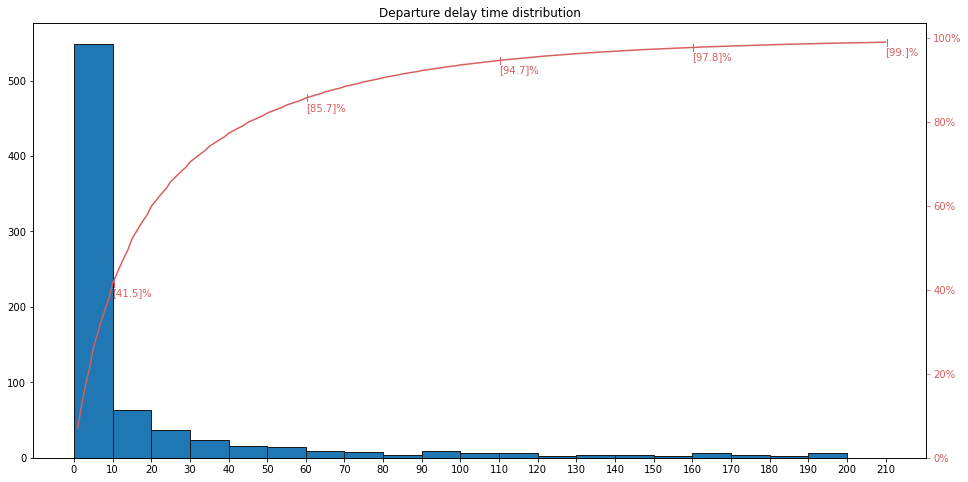

In [201]:
fig, ax = plt.subplots(figsize  = (16,8))
#create freequency histogram plot
bin_ax = np.arange(0, 220, 10)
ax.hist(pareto_dep['DepDelay'], bins = bin_ax, edgecolor='k', linewidth=1)
ax.set_xticks(bin_ax)
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(pareto_dep_top['index'], pareto_dep_top['cumperc'], color='r')
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
#specify axis colors
ax2.tick_params(axis='y', colors='r')
ax2.set_yticks(np.arange(0, 120, 20))
for i in range(10,250,50):
    ax2.text(i,pareto_dep_top[pareto_dep_top['index'] == i]['cumperc']-3,str(round(pareto_dep_top[pareto_dep_top['index'] == i]['cumperc'],1).values)+'%', color='r')
    ax2.text(i,pareto_dep_top[pareto_dep_top['index'] == i]['cumperc']-1,'I', color='r')
plt.title('Departure delay time distribution')
plt.show()

> Distribution of Departure Delay: 
> 41% of flights were delayed less than 10 minutues.
86% of flights were delayed less than 60 minutues (an hours).
95% of flights were delayed less than 110 minutues (nearly 2 hours).
99% of flights were delayed less than 210 minutues (3 and a half hours).

In [150]:
# count number of delay flights by arrival delay time 
pareto_arr = flight.query("ArrDelay > 0")['ArrDelay'].value_counts().reset_index().sort_values('index')
pareto_arr['cumperc'] = pareto_arr['ArrDelay'].cumsum()/pareto_arr['ArrDelay'].sum()*100
pareto_arr_top  = pareto_arr.query("index <= 210")

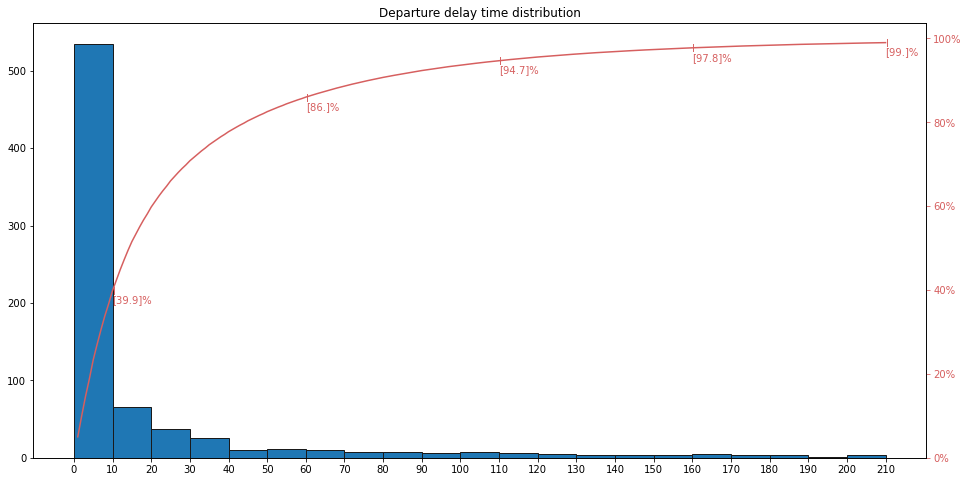

In [151]:
fig, ax = plt.subplots(figsize  = (16,8))
#create freequency histogram plot
bin_ax = np.arange(0, 220, 10)
ax.hist(pareto_arr['ArrDelay'], bins = bin_ax, edgecolor='k', linewidth=1)
ax.set_xticks(bin_ax)
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(pareto_arr_top['index'], pareto_arr_top['cumperc'], color='r')
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
#specify axis colors
ax2.tick_params(axis='y', colors='r')
ax2.set_yticks(np.arange(0, 120, 20))
for i in range(10,250,50):
    ax2.text(i,pareto_arr_top[pareto_arr_top['index'] == i]['cumperc']-3,str(round(pareto_arr_top[pareto_arr_top['index'] == i]['cumperc'],1).values)+'%', color='r')
    ax2.text(i,pareto_arr_top[pareto_arr_top['index'] == i]['cumperc']-1,'I', color='r')
plt.title('Departure delay time distribution')
plt.show()

> Distribution of Arrival Delay: 
> 40% of flights were delayed less than 10 minutues.
86% of flights were delayed less than 60 minutues (an hours).
95% of flights were delayed less than 110 minutues (nearly 2 hours).
99% of flights were delayed less than 210 minutues (3 and a half hours).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Percentage and distribution of Departure and Arrival delay time were similar. This could be understanded as delay on departure may cause delay on arrival. This assumtion should be investigate further in Bivariate Exploration part.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in data.

### 2. The relationship between arrival and departure delay time

> **Was there any relationship between departure and arrival delay time?**

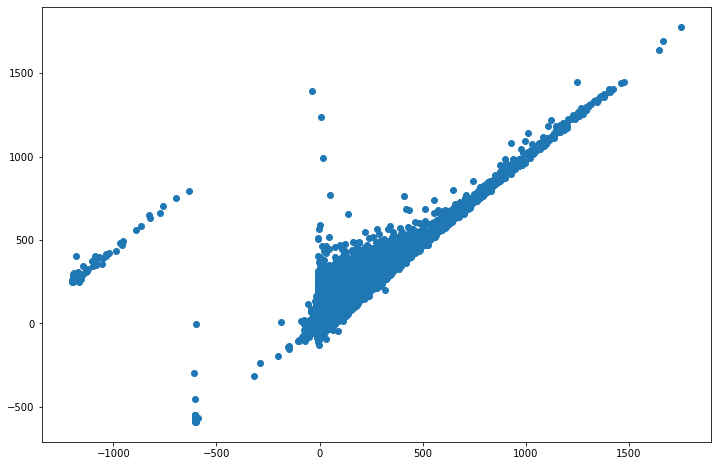

In [26]:
plt.subplots(figsize = (12,8))
plt.scatter(data=flight, x='DepDelay', y='ArrDelay')
plt.show()

>The chart show a positive correlation between arrival and departure delays in which both variables move in the same direction. This means when one departure delays increases as arrival delays also increases and vice versor.

***From this section onwards, delay time will be considered by only departure delay time due to the positive corelation of departure and arrival delay time.***

### 3. Delay time by month and days of week

#### 3.1. Delay time by month

> **What month was worst to book a flight?**

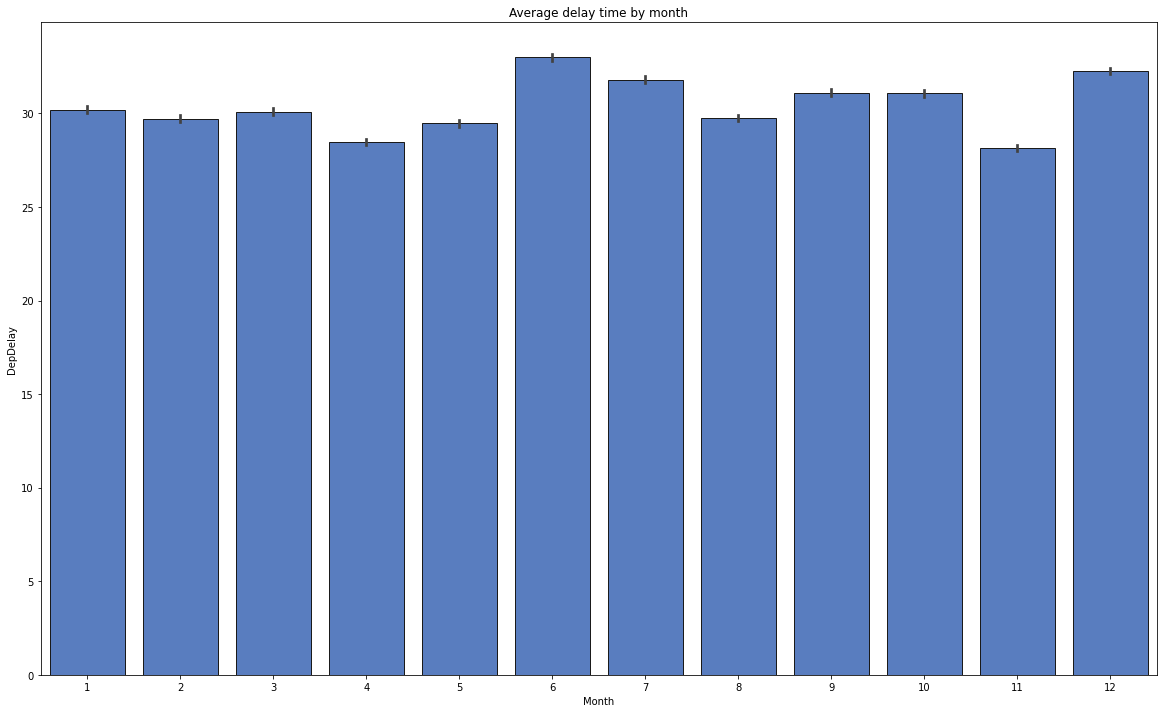

In [184]:
plt.figure(figsize=(20,12))
sb.barplot(data = flight[flight['DepDelay']>0], y = 'DepDelay', x= 'Month', color = 'b', edgecolor='k', linewidth=1)
plt.title('Average delay time by month')
plt.show()

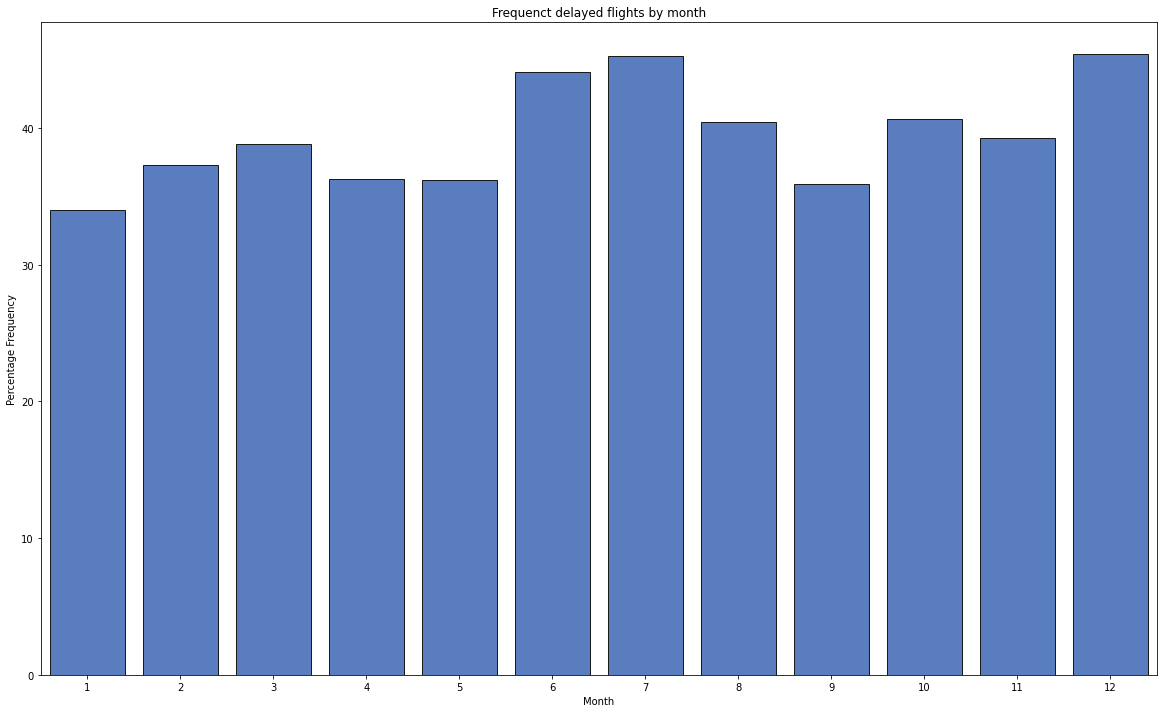

In [189]:
freq_month = flight[flight['DepDelay']>0].groupby('Month').size().reset_index()
freq_month['Total'] = flight.groupby('Month').size().reset_index()[0]
freq_month['Perc'] = (freq_month[0]/freq_month['Total'])*100

plt.figure(figsize=(20,12))
sb.barplot(data = freq_month, y = 'Perc', x= 'Month', color = 'b', edgecolor='k', linewidth=1)
plt.ylabel('Percentage Frequency')
plt.title('Frequenct delayed flights by month')
plt.show()

> Flights tended to be delayed in the middle and end of the year, especially peak in July and December with 45% of total flights be delayed. However, June had max delay time of 33 minutues, followed by December with 32 minutes.

#### 3.2. Delay time by days of week

> **What day of week was worst to book a flight?**

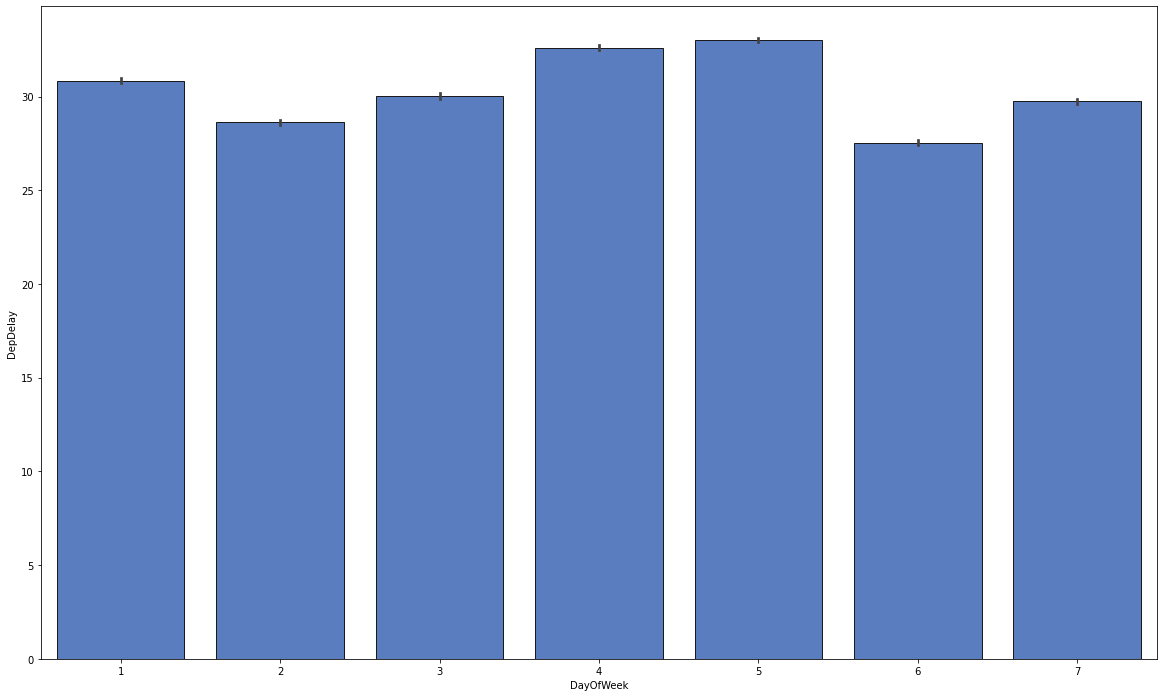

In [29]:
plt.figure(figsize=(20,12))
sb.barplot(data = flight[flight['DepDelay']>0], y = 'DepDelay', x= 'DayOfWeek', color = 'b', edgecolor='k', linewidth=1)
plt.show()

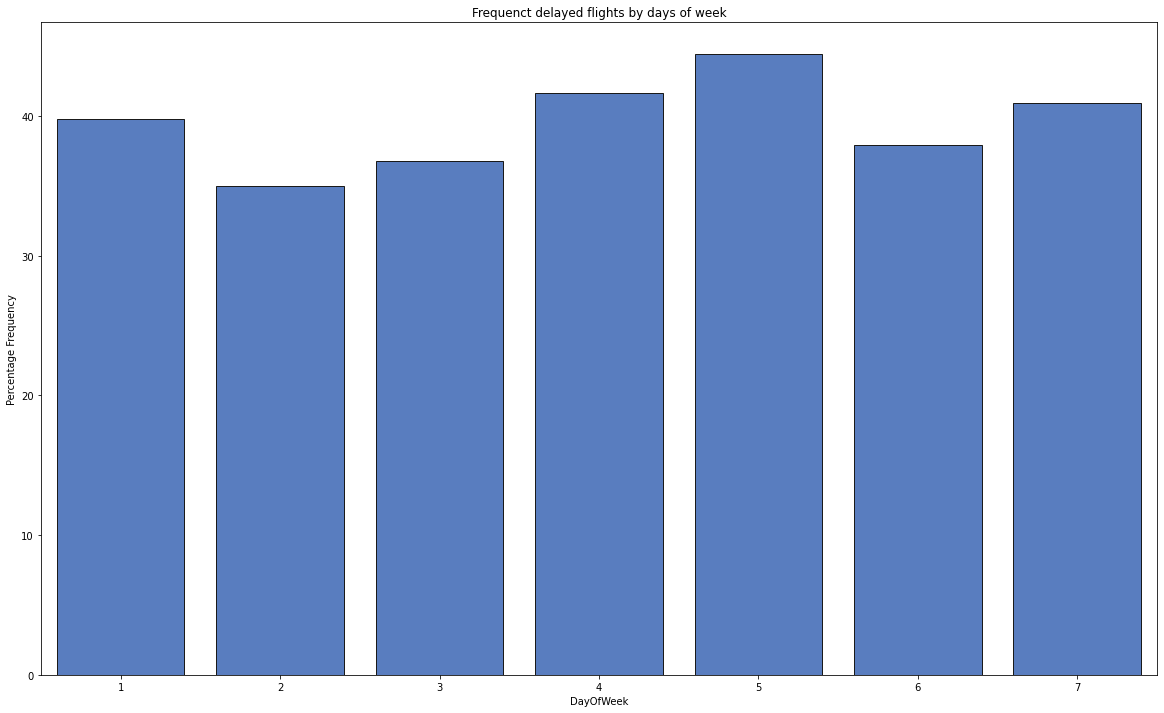

In [191]:
freq_week = flight[flight['DepDelay']>0].groupby('DayOfWeek').size().reset_index()
freq_week['Total'] = flight.groupby('DayOfWeek').size().reset_index()[0]
freq_week['Perc'] = (freq_week[0]/freq_week['Total'])*100

plt.figure(figsize=(20,12))
sb.barplot(data = freq_week, y = 'Perc', x= 'DayOfWeek', color = 'b', edgecolor='k', linewidth=1)
plt.ylabel('Percentage Frequency')
plt.title('Frequenct delayed flights by days of week')
plt.show()

> There were not so much differences between days of weeks. However, in the middle of the week, there were more flights had been delayed with Thursday and Friday accounted for 42% and 45% of total flights respectively. These 2 days of week also had highest delay time which was 33 minutes.

### 4. Delay carriers

#### 4.1. Delay time by carriers

> **What airline had longest delayed time?**

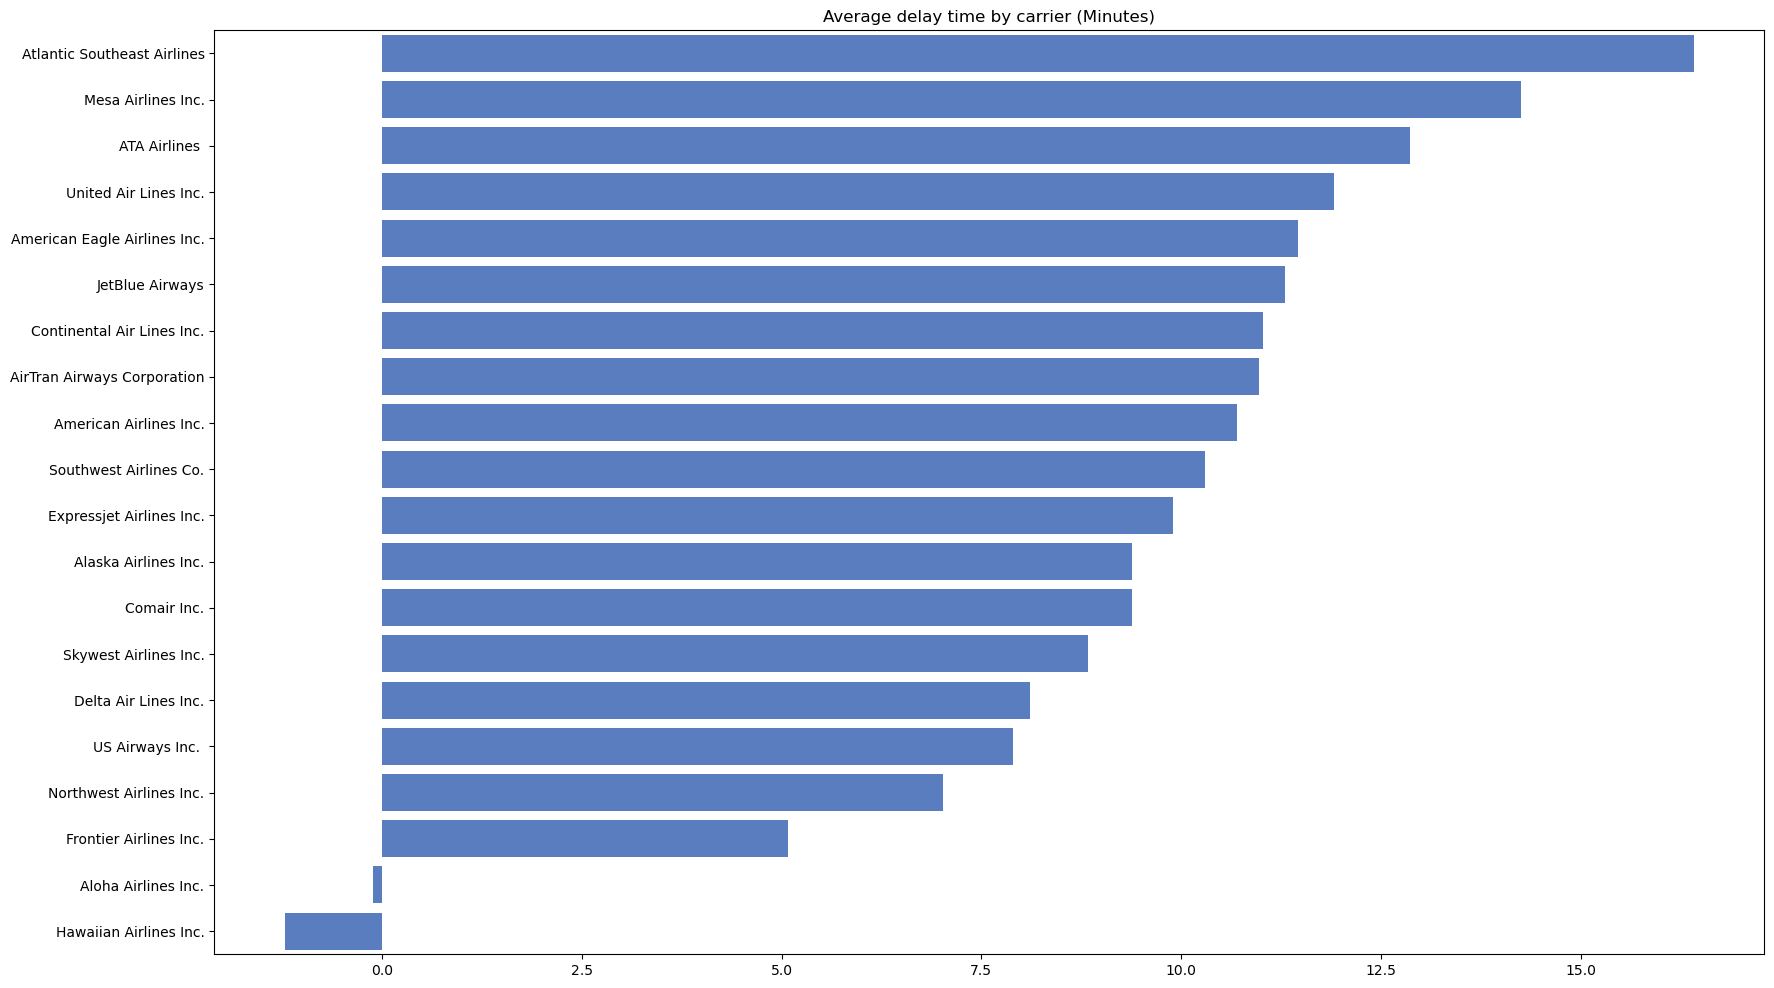

In [23]:
delay_carrier_time = flight.groupby('UniqueCarrier')['DepDelay'].mean().reset_index()
delay_carrier_time = delay_carrier_time.merge(carriers, left_on='UniqueCarrier', right_on='Code').sort_values('DepDelay', ascending=False)

plt.figure(figsize=(20,12))
sb.barplot(data=delay_carrier_time, x="DepDelay", y="Description", color = 'b')
plt.ylabel(None)
plt.xlabel(None)
plt.title('Average delay time by carrier (Minutes)')
plt.show()

> The Atlantic Southeast Airlines has the longest average delay time, which was 16,4 minutes. Mesa and ATA Airlines placed second and third with 14 and 12 minutes respecively. Delay time of other airlines belowed 11 minutes. Especially, Aloha and Hawaiian Airline seemed like not be delayed, even took off early than scheduale.

#### 2.2. Number and percentage of delay flights by carriers

> **Flights of which airline had more chance to be delayed?**

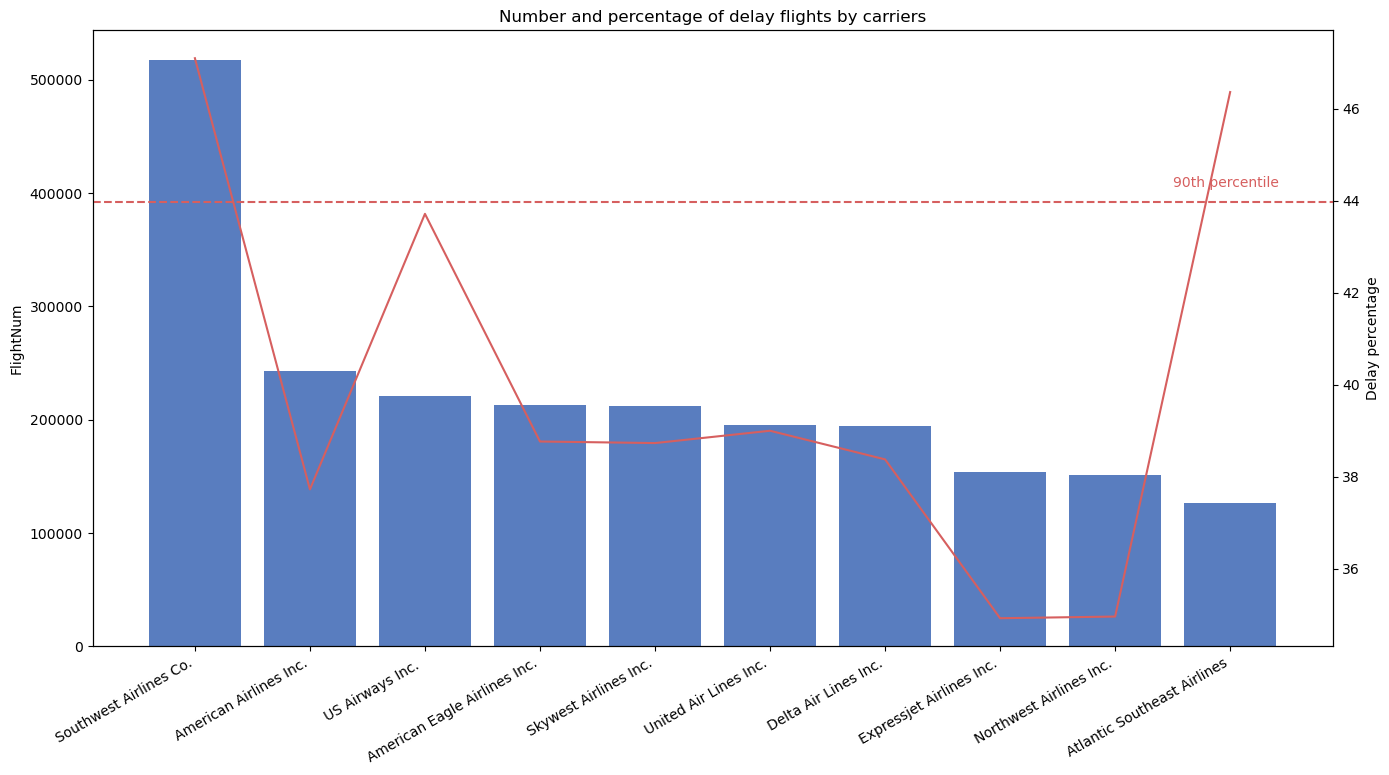

In [18]:
flight_carrier = flight.merge(carriers, left_on='UniqueCarrier', right_on='Code')
delay_carrier = flight_carrier[flight_carrier['DepDelay']>0].groupby('Description')['FlightNum'].count().reset_index()
delay_carrier['Total flight'] = flight_carrier.groupby('Description')['FlightNum'].count().reset_index()['FlightNum']
delay_carrier['Delay percentage'] = delay_carrier['FlightNum']/delay_carrier['Total flight']
delay_carrier_top = delay_carrier.sort_values('FlightNum', ascending=False).nlargest(10,'FlightNum').reset_index()

# create bar chart
fig, ax = plt.subplots(figsize=(16,8))
carrier_num = sb.barplot(data=delay_carrier_top, y="FlightNum", x="Description",color='b', ax=ax)
ax.set_xlabel(None)
ax.set_xticklabels(delay_carrier_top['Description'], rotation=30, ha='right')
# create line chart
ax2 = ax.twinx()
carrier_pct = sb.lineplot(data=delay_carrier_top, y=delay_carrier_top['Delay percentage']*100, x="Description",color='r', ax=ax2)
plt.title('Number and percentage of delay flights by carriers')
# add reference line of 90th percentage
carrier_pct.axhline(delay_carrier['Delay percentage'].quantile(0.9)*100,color = 'r').set_linestyle("--")
plt.text(8.5, delay_carrier['Delay percentage'].quantile(0.9)*100+0.4, '90th percentile', color = 'r', va='center')

plt.show()

> The Southwest Airlines has the highest number and percentage of delayed flights, which had nearly 518 thousands delayed flights and accounted for 47% total flights of this airlines. Though Atlantic Southeast Airlines had less flights than many other airlines, it delayed 46% (second-highest) of its flights.

### 5. Delay area

#### 3.1. Delay flights by origin city

> **What was worst place to take off?**

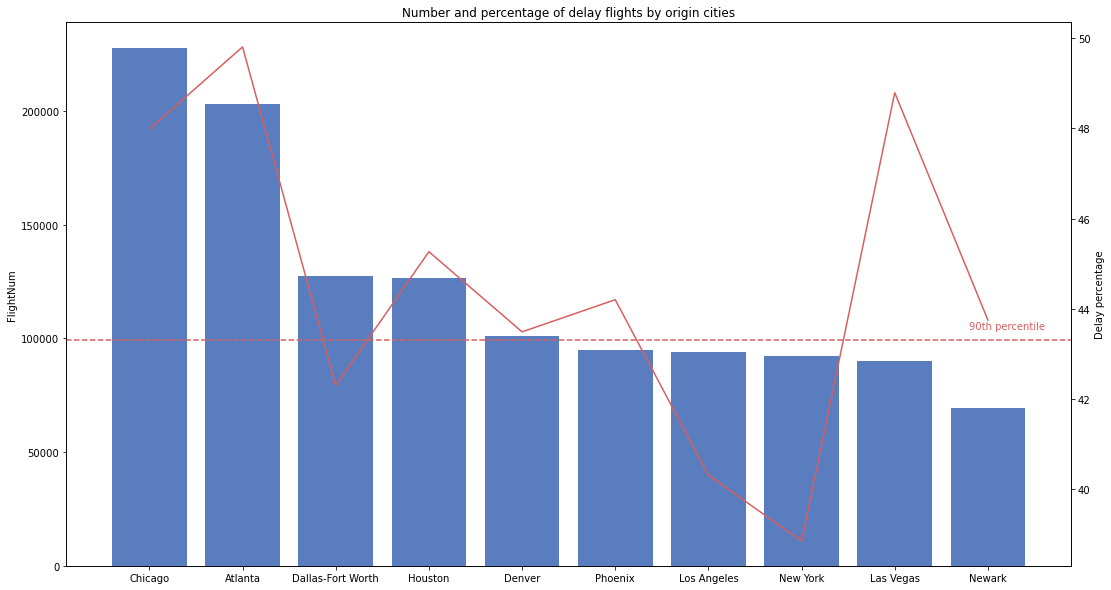

In [84]:
filght_airport_ori = flight.merge(airports, left_on='Origin', right_on='iata')
delay_city_ori = filght_airport_ori[filght_airport_ori['DepDelay']>0].groupby('city')['FlightNum'].count().to_frame()
delay_city_ori['Total flight'] = filght_airport_ori.groupby('city')['FlightNum'].count()
delay_city_ori['Delay percentage'] = delay_city_ori['FlightNum']/delay_city_ori['Total flight']
delay_city_ori_top = delay_city_ori.sort_values('FlightNum', ascending=False).nlargest(10,'FlightNum').reset_index()
# create bar chart
fig, ax = plt.subplots(figsize=(18,10))
ori_airport_num = sb.barplot(data=delay_city_ori_top, x="city", y="FlightNum",color='b', ax=ax)
ax.set_xlabel(None)
# create line chart
ax2 = ax.twinx()
ori_airport_pct = sb.lineplot(data=delay_city_ori_top, x="city", y=delay_city_ori_top["Delay percentage"]*100,color='r', ax=ax2)
plt.title('Number and percentage of delay flights by origin cities')
# add reference line of 90th percentage
ori_airport_pct.axhline(delay_city_ori['Delay percentage'].quantile(0.9)*100,color = 'r').set_linestyle("--")
plt.text(8.8, delay_city_ori['Delay percentage'].quantile(0.9)*100+0.3, '90th percentile', color = 'r', va='center')

plt.show()

> Chicago and Alanta has the highest number and percentage of delayed flights, which had more than 200 thousands delayed flights and accounted for 48 and 50% total flights took off respectively. Though Las Vegas had less delayed flights than many other airlines, it delayed 49% (second-highest) of its flights.

#### 3.2. Delay flights by destination city

> **What was worst place to land off?**

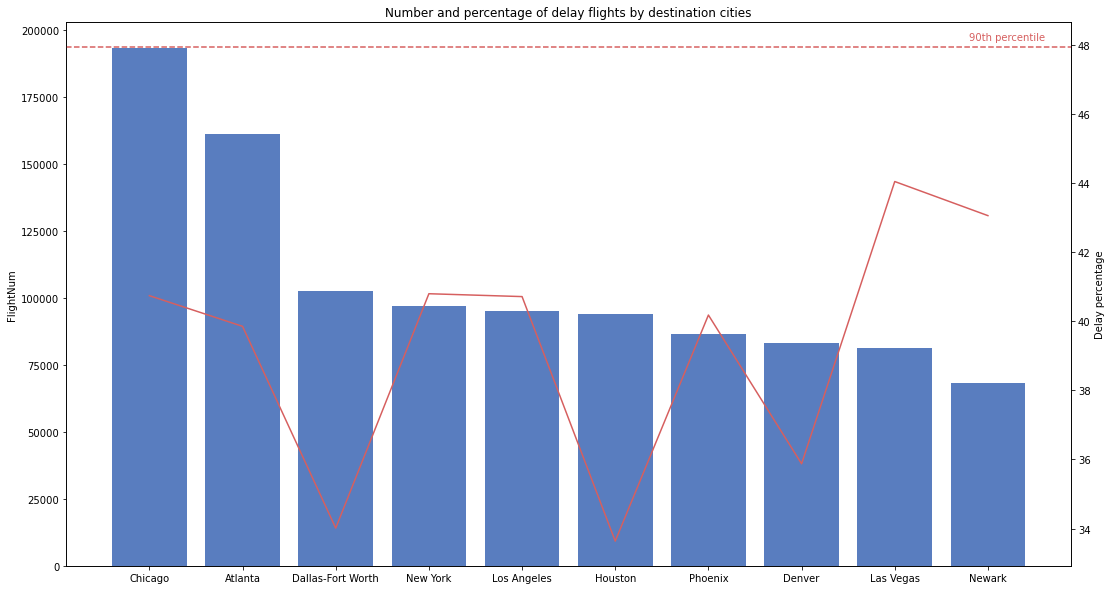

In [86]:
# delay flight by destination city
filght_airport_des = flight.merge(airports, left_on='Dest', right_on='iata')
delay_city_des = filght_airport_des[filght_airport_des['DepDelay']>0].groupby('city')['FlightNum'].count().to_frame()
delay_city_des['Total flight'] = filght_airport_des.groupby('city')['FlightNum'].count()
delay_city_des['Delay percentage'] = delay_city_des['FlightNum']/delay_city_des['Total flight']
delay_city_des_top = delay_city_des.sort_values('FlightNum', ascending=False).nlargest(10,'FlightNum').reset_index()
# create bar chart
fig, ax = plt.subplots(figsize=(18,10))
des_airport_num = sb.barplot(data=delay_city_des_top, x="city", y="FlightNum",color='b', ax=ax)
ax.set_xlabel(None)
# create line chart
ax2 = ax.twinx()
des_airport_pct = sb.lineplot(data=delay_city_des_top, x="city", y=delay_city_des_top["Delay percentage"]*100,color='r', ax=ax2)
plt.title('Number and percentage of delay flights by destination cities')
# add reference line of 90th percentage
des_airport_pct.axhline(delay_city_des['Delay percentage'].quantile(0.9)*100,color = 'r').set_linestyle("--")
plt.text(8.8, delay_city_des['Delay percentage'].quantile(0.9)*100+0.3, '90th percentile', color = 'r', va='center')

plt.show()

> Chicago, Alanta and Dallas-Fort Worth also top 3 highest number of delayed flights. This can be investigate further to find reason of delay.

### 5. Delay reason

#### 5.1. Delay reason distribution

> **What delay reason contributed the most to delayed time?**

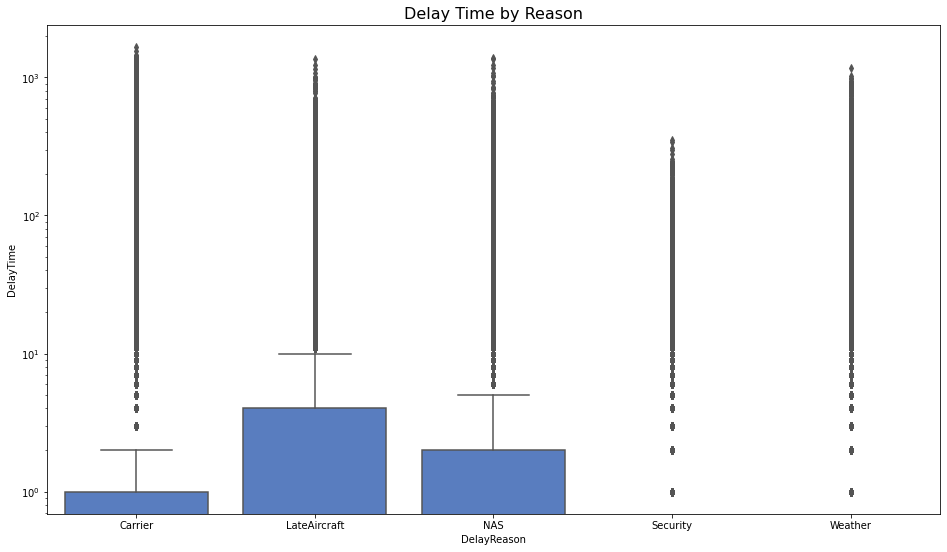

In [54]:
# melting columns such that type of delay comes in one column
MELTS_COLUMNS = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
STAY_COLUMNS = ['UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', 'DepDelay', 'ArrDelay']
delay_reason = pd.melt(flight[flight['DepDelay'] > 0], id_vars=STAY_COLUMNS, value_vars=MELTS_COLUMNS, var_name='DelayReason', value_name='DelayTime')
delay_reason['DelayReason'] = delay_reason['DelayReason'].str[:-5] # remove the ending 'Delay' from 'Cause' strings

plt.figure(figsize=(16, 9))
order = delay_reason.groupby('DelayReason')['DelayTime'].median().sort_values(ascending=False).index
sb.boxplot(data=delay_reason, x='DelayReason', y='DelayTime', order=order, color = 'b')
plt.yscale('log')
plt.title('Delay Time by Reason', fontsize=16)
plt.show()

> Late Aircraft were main reasons of delayed flights, followed by NAS and Carrier. 

### 4. The relationship between departure delay time and delay reason

> **What delay reason related most to delayed time?**

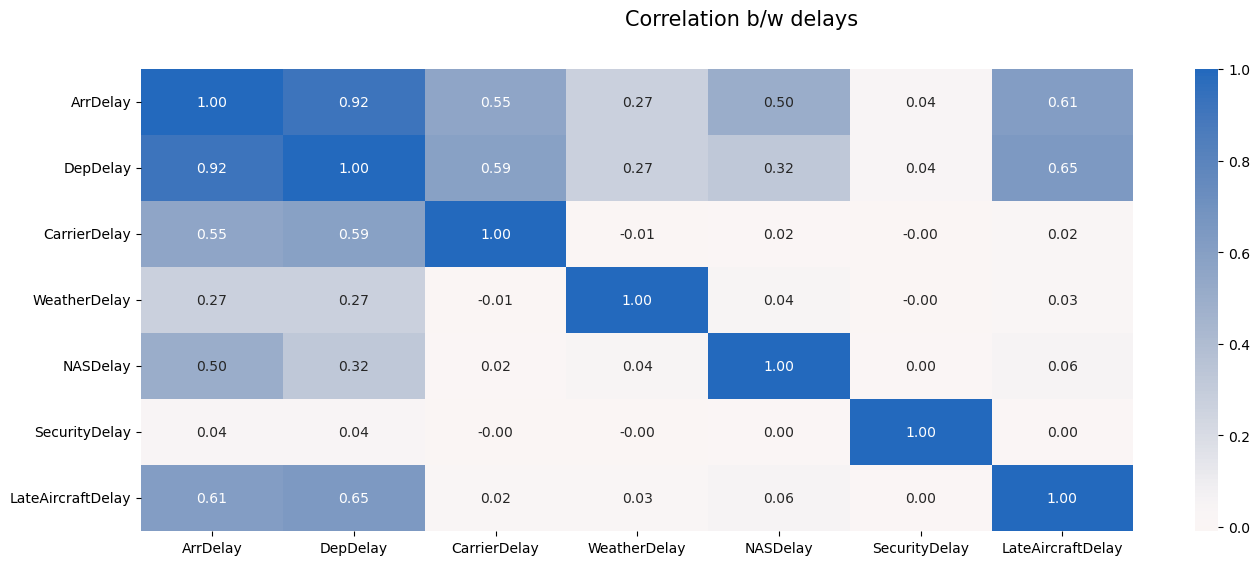

In [9]:
plt.figure(figsize=(16, 6))
sb.heatmap(flight[['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0);
plt.suptitle('Correlation b/w delays', size=15);

> Both Arrival and Departure delay also have ~0.5 correlation with Carrier and Late Aircraft delay meaning that in case of Carrier and Late Aircraft delay, the flight has higher chance of departing/arriving late.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The biggest reason for the flights to be cancelled is the Carrier causes followed by Weather causes.

> July and December were the worst month to travel having maximum proportion of delays. Thursday and Friday were the worst day of week to travel having maximum proportion of delays.

> The Southwest Airlines was the origin place which had the highest number and percentage of delayed flights. Though Atlantic Southeast Airlines had less flights than many other airlines, it delayed 46% (second-highest) of its flights.

> Chicago and Alanta were destication places which had the highest number and percentage of delayed flights. Though Las Vegas had less delayed flights than many other airlines, it delayed 49% (second-highest) of its flights.

> The Atlantic Southeast Airlines has the longest average delay time, followed by Mesa and ATA Airlines.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **What delay reason happened the most per airline?**

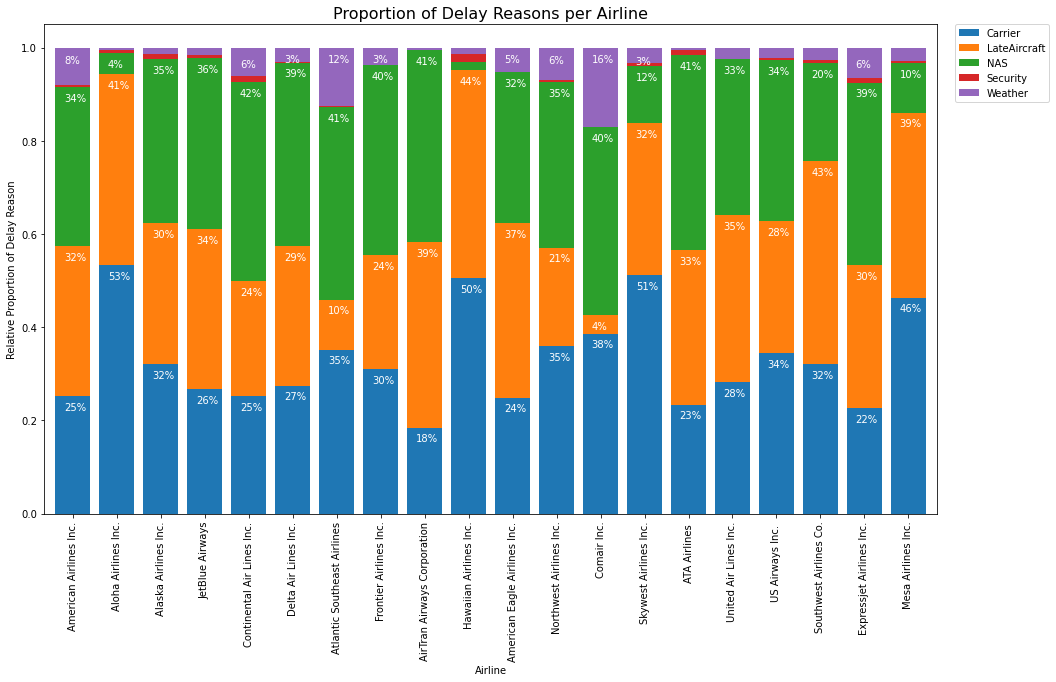

In [155]:
df_plot = delay_reason[delay_reason['DelayTime']>0].groupby(['DelayReason', 'UniqueCarrier']).size().reset_index().\
                            pivot(columns='DelayReason', index='UniqueCarrier', values=0)   

del_by_airln = delay_reason[delay_reason['DelayTime']>0].groupby('UniqueCarrier').size()

# Calculate proportion of delayed flight operations by airlines
df_plot_proportion = df_plot.div(del_by_airln, axis='index')
df_plot_proportion = df_plot_proportion.merge(carriers, left_on='UniqueCarrier', right_on='Code').set_index('Description')

data_idx = df_plot_proportion.index

#create stacked bar chart
df_plot_proportion.plot.bar(stacked=True, width = 0.8, figsize=(16, 9))
plt.title('Proportion of Delay Reasons per Airline', fontsize=16)
plt.xlabel('Airline')
plt.ylabel('Relative Proportion of Delay Reason')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

# Annotations
for idx in data_idx: 
    initial_height = 0
    for col in df_plot_proportion.columns:   # ['Carrier', 'LateAircraft', 'NAS', 'Security', 'Weather']   
        if col != 'Code' and col != 'Security':  
            value  = df_plot_proportion.loc[idx, col]
            text   = str(int(value * 100)) + '%'
            height = value + initial_height
            x_loc  = data_idx.get_loc(idx)
            if value > 0.03:
                plt.annotate(text, (x_loc - .2, height - .03), color = 'w')#, fontsize=8);
        initial_height = height
plt.show()

> The NAS is the most common delay cause for most of the airlines and Security the least common. For some airlines such as AQ, HA, OO and YV, Carrier causes the most delay.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Delay time had positive correlation with Carrier, Late Aircraft and NAS delay meaning that in case of Carrier, Late Aircraft and NAS delay, the flight had higher chance of departing/arriving late. 

> For majority of the airlines, Late Aircraft followed by NAS cause longer delays. 

## Conclusions
> This exploration of flight data analysis delay flights and investigate its reasons.

In [6]:
!jupyter nbconvert --to html Flight_Part_I_exploration.ipynb

[NbConvertApp] Converting notebook Flight_Part_I_exploration.ipynb to html
[NbConvertApp] Writing 1136114 bytes to Flight_Part_I_exploration.html
